In [1]:
import pyrealsense2 as rs
import numpy as np
import cv2
import msgpack as msgp
import msgpack_numpy as mpn
import os
import os.path
import time
from datetime import date, datetime
from numpy import random
import matplotlib.pyplot as plt

In [2]:
pc = rs.pointcloud()
# Configure depth and color streams
pipeline = rs.pipeline()
config = rs.config()

# Get device product line for setting a supporting resolution
pipeline_wrapper = rs.pipeline_wrapper(pipeline)
pipeline_profile = config.resolve(pipeline_wrapper)
device = pipeline_profile.get_device()

In [3]:
h=480 # 720 
w=640 # 1280
fps=30

In [4]:
config.enable_stream(rs.stream.depth, w, h, rs.format.z16, fps)

config.enable_stream(rs.stream.color, w, h, rs.format.bgr8, fps)

In [5]:
profile=pipeline.start(config)

# Create colorizer object
colorizer = rs.colorizer()

align_to = rs.stream.color
align = rs.align(align_to)

In [6]:
frames = pipeline.wait_for_frames()

# Aligning the depth and color frames
aligned_frames = align.process(frames)
depth_frame = frames.get_depth_frame()
color_frame = frames.get_color_frame()

In [7]:
# Get aligned frames
aligned_depth_frame = aligned_frames.get_depth_frame() 
color_frame = aligned_frames.get_color_frame()

# Convert images to numpy arrays
depth_image = np.asanyarray(aligned_depth_frame.get_data()) 
color_image = np.asanyarray(color_frame.get_data()) 

In [8]:
aligned_depth_frame

<pyrealsense2.frame Z16 #1 @1688018339512.683838>

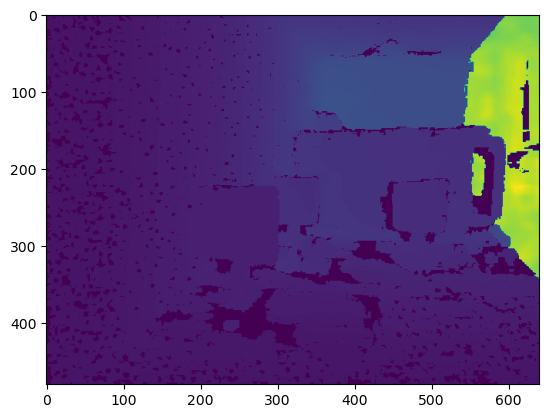

In [9]:
plt.imshow(np.asanyarray(aligned_depth_frame.get_data()))

In [10]:
# pc.calculate(np.asanyarray(aligned_depth_frame.get_data()))

TypeError: calculate(): incompatible function arguments. The following argument types are supported:
    1. (self: pyrealsense2.pyrealsense2.pointcloud, depth: pyrealsense2.pyrealsense2.frame) -> pyrealsense2.pyrealsense2.points

Invoked with: <pyrealsense2.pyrealsense2.pointcloud object at 0x000001F07C6E00B0>, array([[ 216,  216,  216, ..., 3351, 3351, 3351],
       [ 216,  216,  216, ..., 3370, 3370, 3370],
       [ 216,  216,  216, ..., 3370, 3370, 3370],
       ...,
       [   0,    0,    0, ...,  246,  246,  246],
       [   0,    0,    0, ...,  245,  245,  245],
       [   0,    0,    0, ...,  245,  245,  245]], dtype=uint16)

In [11]:
points = pc.calculate(aligned_depth_frame)
v = points.get_vertices()
verts = np.asanyarray(v).view(np.float32)
xyzpos=verts.reshape(h,w, 3)  # xyz
xyzpos=xyzpos.astype(np.float16)

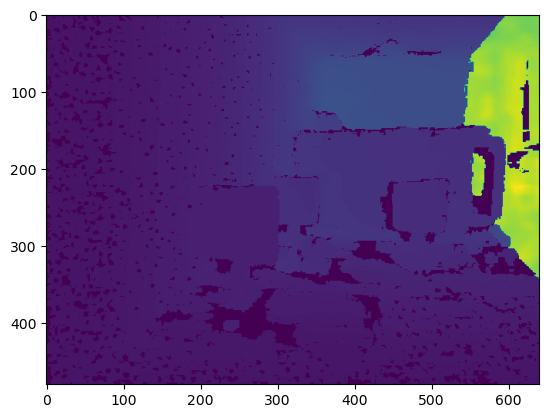

In [12]:
plt.imshow(np.asanyarray(aligned_depth_frame.get_data())*aligned_depth_frame.get_units())

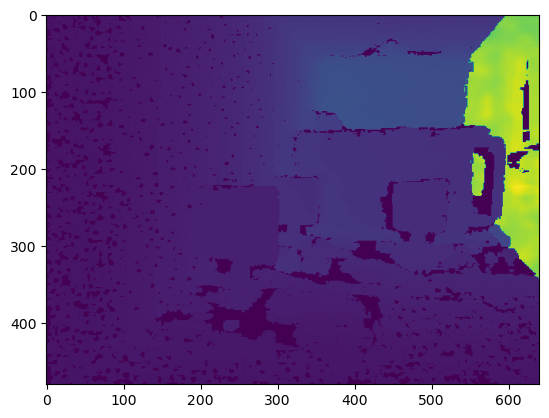

In [13]:
plt.imshow(xyzpos[:,:,2])

In [14]:
rawimg = np.asanyarray(aligned_depth_frame.get_data())*aligned_depth_frame.get_units()
processedimg = xyzpos[:,:,2]

In [15]:
res = rawimg - processedimg
res.max().max()

0.001781449536792934

In [16]:
xyzpos[:,:,2]

array([[0.216, 0.216, 0.216, ..., 3.352, 3.352, 3.352],
       [0.216, 0.216, 0.216, ..., 3.37 , 3.37 , 3.37 ],
       [0.216, 0.216, 0.216, ..., 3.37 , 3.37 , 3.37 ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.246, 0.246, 0.246],
       [0.   , 0.   , 0.   , ..., 0.245, 0.245, 0.245],
       [0.   , 0.   , 0.   , ..., 0.245, 0.245, 0.245]], dtype=float16)

In [17]:
(np.asanyarray(aligned_depth_frame.get_data())*aligned_depth_frame.get_units()).shape

(480, 640)

In [18]:
LS, LE, LW, RS, RE, RW, TR = [], [], [], [], [], [], []

land_marks = {'LS': LS, 'LE': LE, 'LW': LW, 'RS': RS, 'RE': RE, 'RW': RW, 'TR': TR}
LS.append(1)
land_marks['LS']

[1]